In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import seaborn as sns

In [2]:
car_df = pd.read_csv("../Dataset/Carsales_dataset.csv")

car_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
car_df.drop(columns=["Manufacturer", "Vehicle_type", "Model", "Latest_Launch"], inplace=True)

In [4]:
car_df["__year_resale_value"].fillna(car_df["__year_resale_value"].median(), inplace=True)

In [5]:
car_df.fillna(0, inplace=True)

In [6]:
car_df.isna().sum()

Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [7]:
train, test = train_test_split(car_df, test_size=0.3)

data_x = car_df.drop(columns=["Sales_in_thousands"])
data_y = car_df["Sales_in_thousands"]

scaler = StandardScaler()
scaler.set_output(transform="pandas")

car_x_scaled = scaler.fit_transform(data_x)

In [8]:
samples = []
for sample_size in range(10,10*15, 10):
    train_x, _ = train_test_split(car_x_scaled, train_size=sample_size)
    samples.append(train_x)

In [9]:
def regSummary(y_true, y_pred, sample):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred)),
        "Sample Size": len(sample)
}

In [10]:
test_error = []
train_error = []
for sample in samples:

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(train_x, train_y)

    test_predict = reg.predict(test_x)
    train_predict = reg.predict(train_x)
    
    n1 = regSummary(test_y, test_predict, sample)
    n2 = regSummary(train_y, train_predict, sample)
    test_error.append(n1)
    train_error.append(n2)


In [11]:
test_error_df = pd.DataFrame(test_error)
train_error_df = pd.DataFrame(train_error)

In [12]:
def plot_line(x,y,x_label,y_label,axes,label):
    axes.plot(x,y, label=label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")
    axes.legend()

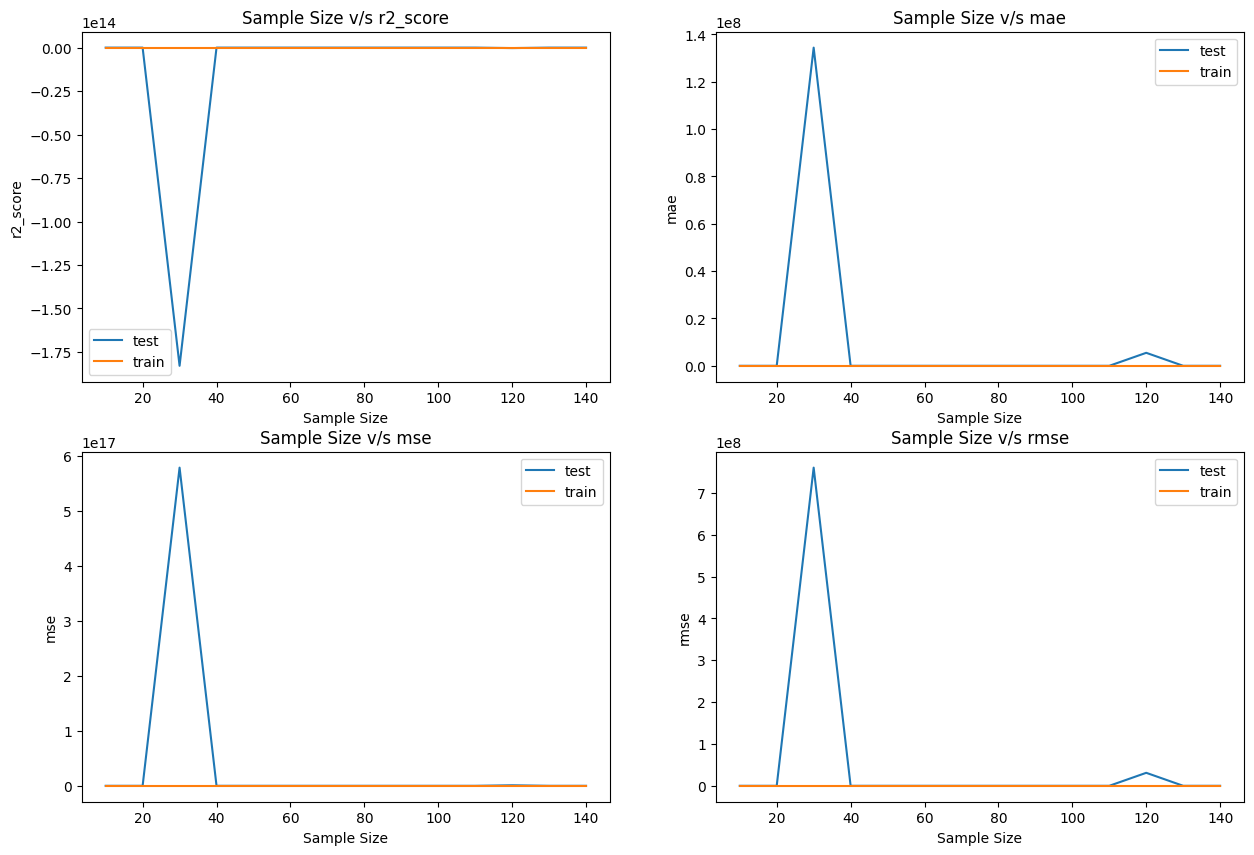

In [13]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)

axes = axes.flatten()
testcolumns = test_error_df.columns

for ax, col in zip(axes, testcolumns):
    plot_line(test_error_df["Sample Size"], test_error_df[col], x_label="Sample Size", y_label=col, axes=ax,label="test")
    plot_line(train_error_df["Sample Size"], train_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="train")


In [14]:
data_y

0      16.919
1      39.384
2      14.114
3       8.588
4      20.397
        ...  
152     3.545
153    15.245
154    17.531
155     3.493
156    18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

In [15]:
# train, test = train_test_split(car_df, test_size=0.2)

# data_x = car_df["Horsepower"]
# data_y = car_df["Sales_in_thousands"]

samples = []
for sample_size in range(10,10*13, 10):
    train_x, _ = train_test_split(car_df, train_size=sample_size)
    samples.append(train_x)

In [16]:
test_error = []
train_error = []
data_x = car_df["Horsepower"].to_numpy().reshape(-1,1)
data_y = car_df["Sales_in_thousands"].to_numpy().reshape(-1,1)
for sample in samples:

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(train_x, train_y)

    test_predict = reg.predict(test_x)
    train_predict = reg.predict(train_x)
    
    n1 = regSummary(test_y, test_predict, sample)
    n2 = regSummary(train_y, train_predict, sample)
    test_error.append(n1)
    train_error.append(n2)

In [17]:
test_error_df = pd.DataFrame(test_error)
train_error_df = pd.DataFrame(train_error)

In [18]:
def plot_line(x,y, x_label, y_label, axes, label):
    axes.plot(x,y, label=label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")
    axes.legend()

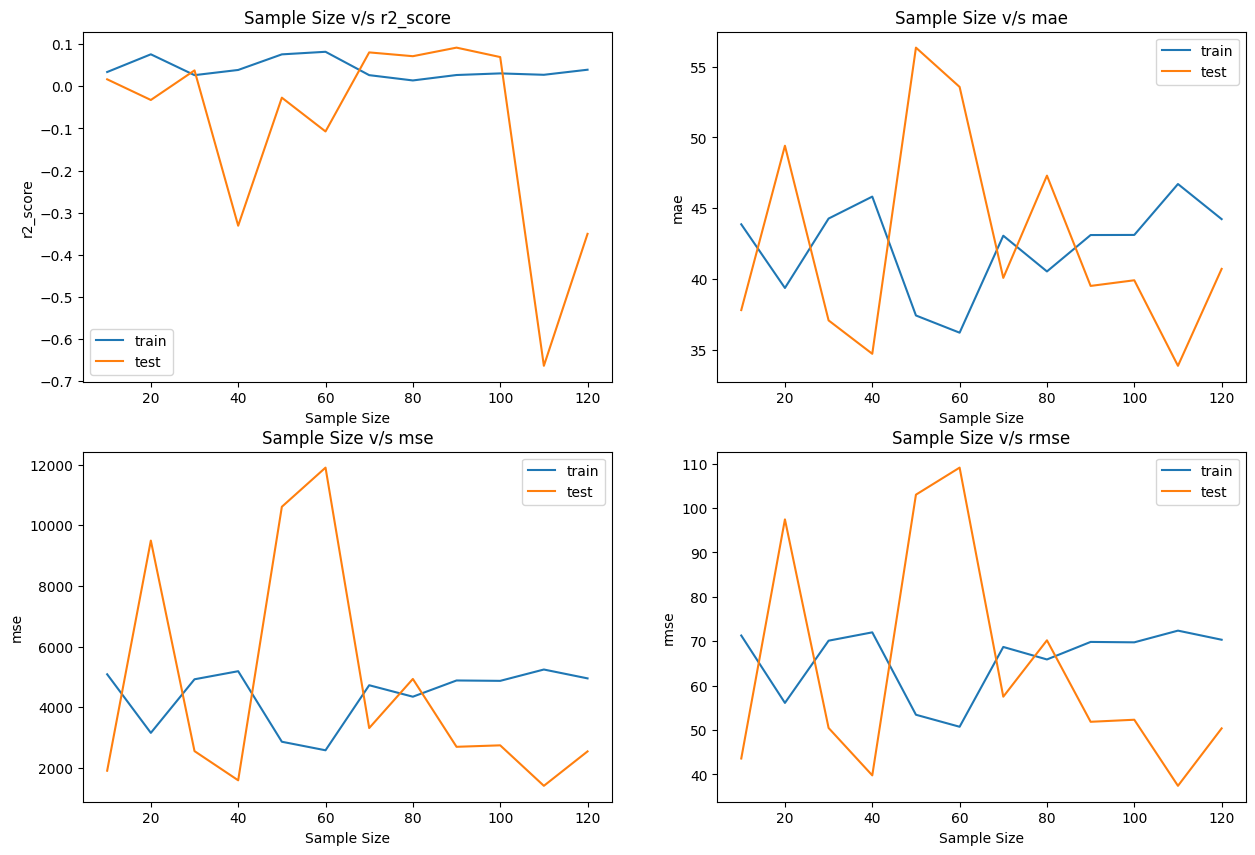

In [19]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
axes = axes.flatten()
column = train_error_df.columns

for ax, col in zip(axes, column):
    plot_line(train_error_df["Sample Size"], train_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="train")
    plot_line(test_error_df["Sample Size"], test_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="test")

<Axes: >

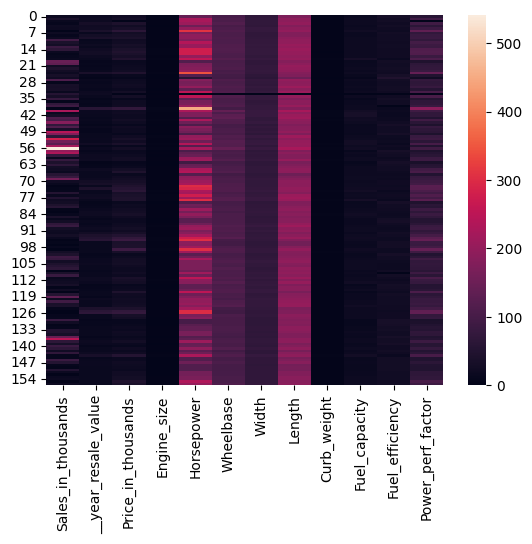

In [20]:
sns.heatmap(car_df)

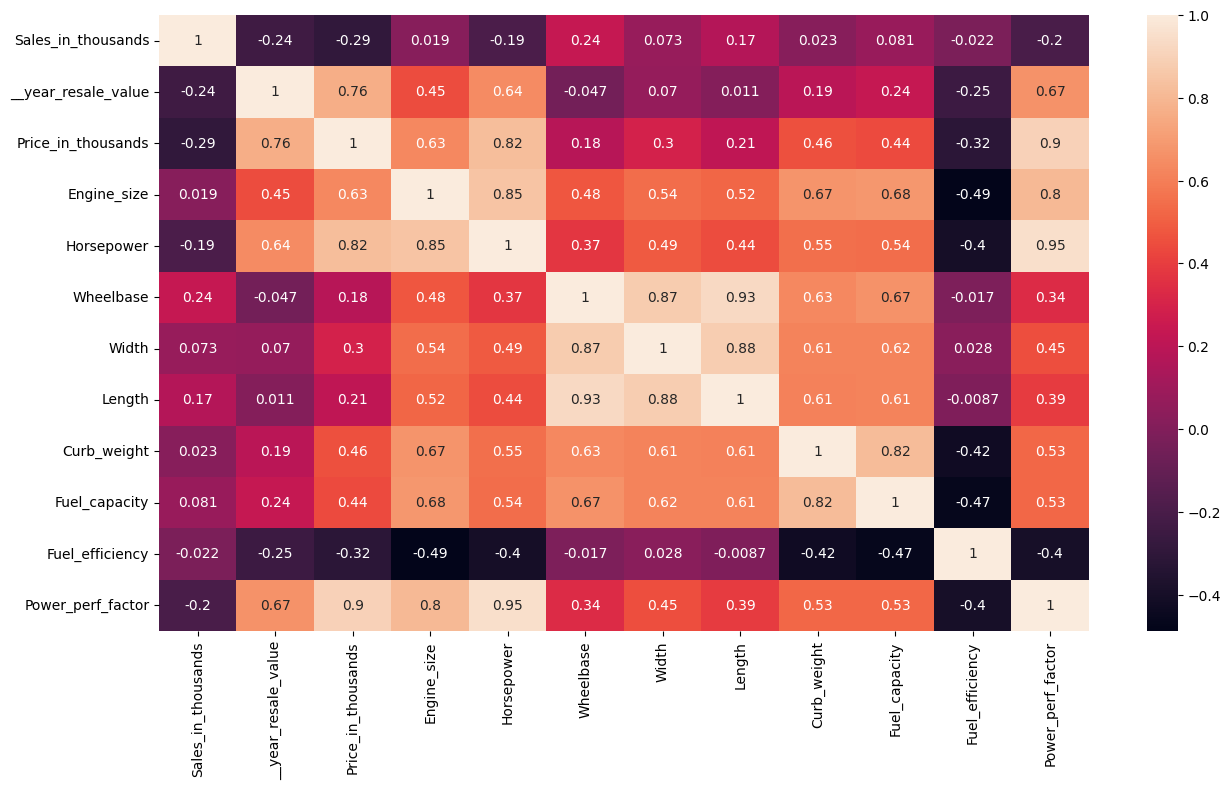

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(car_df.corr(numeric_only=True), annot=True, ax=ax)
plt.show()

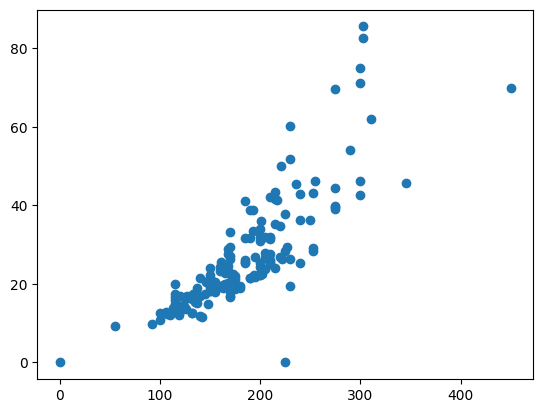

In [22]:
plt.scatter(x=car_df["Horsepower"], y=car_df["Price_in_thousands"])